In [126]:
import requests
from bs4 import BeautifulSoup

base_url = "https://nyuad.nyu.edu/en/academics/divisions/"

# List of divisions
divisions = ["social-science", "arts-and-humanities", "engineering", "science"]  # Add more divisions as needed
faculty_url_set = set()
for division in divisions:
    division_url = f"{base_url}{division}/faculty.html/"
    
    # Send a GET request to the division URL
    response = requests.get(division_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the division page
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all faculty member links
        faculty_links = soup.find_all('a', href=True)

        # Extract and print the URLs of faculty members
        for link in faculty_links:
            faculty_url = link['href']
            if "/faculty/" in faculty_url:  # Check if the link is for a faculty member
                full_faculty_url = f"https://nyuad.nyu.edu{faculty_url}"
                #print("Faculty URL:", full_faculty_url)
                faculty_url_set.add(full_faculty_url)
    else:
        print(f"Failed to retrieve the {division} division page. Status Code:", response.status_code)
    
faculty_url_list = list(faculty_url_set)

In [127]:
import requests

# List to store downloaded HTML content
html_content_list = []

for url in faculty_url_list:
    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Append the HTML content to the list
        html_content_list.append(response.text)

    else:
        print("Failed to retrieve the page. Status Code:", response.status_code)

import pandas as pd
import csv
html_content_df = pd.DataFrame(html_content_list)

output0_file = 'output0.csv'
html_content_df.to_csv(output0_file, index=False, quoting=csv.QUOTE_NONNUMERIC)

In [128]:
import pandas as pd
html_content_df = pd.read_csv('output0.csv', header=0)
html_content_df

,0
0,"\n<!doctype html>\n<html lang=""en"" dir=""ltr"" p..."
1,"\n<!doctype html>\n<html lang=""en"" dir=""ltr"" p..."
2,"\n<!doctype html>\n<html lang=""en"" dir=""ltr"" p..."
3,"\n<!doctype html>\n<html lang=""en"" dir=""ltr"" p..."
4,"\n<!doctype html>\n<html lang=""en"" dir=""ltr"" p..."
...,...
371,"\n<!doctype html>\n<html lang=""en"" dir=""ltr"" p..."
372,"\n<!doctype html>\n<html lang=""en"" dir=""ltr"" p..."
373,"\n<!doctype html>\n<html lang=""en"" dir=""ltr"" p..."
374,"\n<!doctype html>\n<html lang=""en"" dir=""ltr"" p..."


In [129]:
import pandas as pd
from bs4 import BeautifulSoup

faculty_data = []  # List to store information about professors

# Use the HTML content previously stored in html_content_list
for url, html_content in zip(faculty_url_list, html_content_list):
    # Parse the HTML content
    soup = BeautifulSoup(html_content, 'html.parser')

    # Extract the professor's name
    professor_name = soup.find('h1').text.strip()

    # Extract the entire content within the research-areas div
    research_areas_tag = soup.find('div', class_='research-areas')
    research_areas = research_areas_tag.get_text(strip=True, separator='\n') if research_areas_tag else ""

    # Extract division information directly from the URL
    division_info = url.split("/")[6] if len(url.split("/")) > 6 else ""

    # Extract the bio information
    bio_tag = soup.find('hr', class_='faculty-sep faculty-bio-sep')
    if bio_tag:
        bio = ""
        next_sibling = bio_tag.find_next_sibling()
        while next_sibling and next_sibling.name != 'div':
            bio += str(next_sibling).strip()
            next_sibling = next_sibling.find_next_sibling()

        bio = BeautifulSoup(bio, 'html.parser').get_text(strip=True, separator='\n')
    else:
        bio = ""

    # Store the information in a dictionary
    professor_info = {
        'Professor Name': professor_name,
        'Research Areas': research_areas,
        'Division': division_info,
        'Bio': bio
    }

    # Add the dictionary to the list
    faculty_data.append(professor_info)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(faculty_data)
backup = pd.DataFrame(faculty_data)
# Print the DataFrame
df

,Professor Name,Research Areas,Division,Bio
0,Robert Volcic,Research Websites:\nVolcic Lab\nResearch Areas...,science,"Prior to joining NYU Abu Dhabi in 2015, he was..."
1,Jon Sprouse,"Research Areas:\nLinguistics, Experimental Syntax",science,Jon Sprouse is an experimental syntactician. H...
2,Maya Kesrouany,Research Areas:\ntwentieth- and twenty-first c...,arts-and-humanities,Maya Kesrouany is an Assistant Professor of Mo...
3,Sabino Kornrich,Research Areas:\nFamily; Inequality; Gender,social-science,Sabino Kornrich is a sociologist who studies i...
4,Masha Kirasirova,Research Areas:\nPolitical and Cultural Histor...,arts-and-humanities,Masha Kirasirova is a historian of exchanges b...
...,...,...,...,...
371,Jonathan Shannon,Research Areas:\nArab world; Mediterranean; Mu...,arts-and-humanities,Jonathan Shannon earned a BA in English Litera...
372,Alicja Reuben,"Research Areas:\nCSR, Gender, Valuation Techni...",social-science,Alicja Reuben holds a BSFS from Georgetown Uni...
373,Andrew Wilson Tillotson,"Research Areas:\nPhysics Education Research, I...",science,Andy's focus at NYU Abu Dhabi is teaching phys...
374,Qingtao Chen,"Research Areas:\nMathematical Physics, Quantum...",science,"Qingtao Chen studies Mathematical Physics, a s..."


In [130]:
import csv

# Assuming faculty_data is a list of dictionaries containing faculty information

df = pd.DataFrame(faculty_data)

def split_research_info(info):
    research_areas_start = info.find("Research Areas:")
    research_websites_start = info.find("Research Websites:")

    if research_websites_start != -1:
        research_websites = info[research_websites_start + len("Research Websites:"):research_areas_start].strip()
    else:
        research_websites = ""

    research_area = info[research_areas_start + len("Research Areas:"):].strip()

    return research_area, research_websites

df['Research Area'], df['Research Websites'] = zip(*df['Research Areas'].apply(split_research_info))
df.drop(columns=['Research Areas'], inplace=True)

output_file = 'output1.csv'
df.to_csv(output_file, index=False, quoting=csv.QUOTE_NONNUMERIC)
df

,Professor Name,Division,Bio,Research Area,Research Websites
0,Robert Volcic,science,"Prior to joining NYU Abu Dhabi in 2015, he was...","Neuroscience, Cognitive Systems",Volcic Lab
1,Jon Sprouse,science,Jon Sprouse is an experimental syntactician. H...,"Linguistics, Experimental Syntax",
2,Maya Kesrouany,arts-and-humanities,Maya Kesrouany is an Assistant Professor of Mo...,twentieth- and twenty-first century cultural p...,
3,Sabino Kornrich,social-science,Sabino Kornrich is a sociologist who studies i...,Family; Inequality; Gender,
4,Masha Kirasirova,arts-and-humanities,Masha Kirasirova is a historian of exchanges b...,Political and Cultural History of the Soviet U...,
...,...,...,...,...,...
371,Jonathan Shannon,arts-and-humanities,Jonathan Shannon earned a BA in English Litera...,Arab world; Mediterranean; Music; Arts; Aesthe...,
372,Alicja Reuben,social-science,Alicja Reuben holds a BSFS from Georgetown Uni...,"CSR, Gender, Valuation Techniques, SSC",
373,Andrew Wilson Tillotson,science,Andy's focus at NYU Abu Dhabi is teaching phys...,"Physics Education Research, Instructional Stra...",
374,Qingtao Chen,science,"Qingtao Chen studies Mathematical Physics, a s...","Mathematical Physics, Quantum Topology and Glo...",


In [131]:
# Specify the column names
column_names = ["Professor Name", "Division", "Bio", "Research Area", "Research Websites"]

# Load the CSV file into a DataFrame
df = pd.read_csv('output1.csv', header=0, names=column_names)

# Display the DataFrame
df

,Professor Name,Division,Bio,Research Area,Research Websites
0,Robert Volcic,science,"Prior to joining NYU Abu Dhabi in 2015, he was...","Neuroscience, Cognitive Systems",Volcic Lab
1,Jon Sprouse,science,Jon Sprouse is an experimental syntactician. H...,"Linguistics, Experimental Syntax",NaN
2,Maya Kesrouany,arts-and-humanities,Maya Kesrouany is an Assistant Professor of Mo...,twentieth- and twenty-first century cultural p...,NaN
3,Sabino Kornrich,social-science,Sabino Kornrich is a sociologist who studies i...,Family; Inequality; Gender,NaN
4,Masha Kirasirova,arts-and-humanities,Masha Kirasirova is a historian of exchanges b...,Political and Cultural History of the Soviet U...,NaN
...,...,...,...,...,...
371,Jonathan Shannon,arts-and-humanities,Jonathan Shannon earned a BA in English Litera...,Arab world; Mediterranean; Music; Arts; Aesthe...,NaN
372,Alicja Reuben,social-science,Alicja Reuben holds a BSFS from Georgetown Uni...,"CSR, Gender, Valuation Techniques, SSC",NaN
373,Andrew Wilson Tillotson,science,Andy's focus at NYU Abu Dhabi is teaching phys...,"Physics Education Research, Instructional Stra...",NaN
374,Qingtao Chen,science,"Qingtao Chen studies Mathematical Physics, a s...","Mathematical Physics, Quantum Topology and Glo...",NaN


In [132]:
# Assuming you already have a DataFrame named df

# Replace newline characters with semicolons in the entire DataFrame
df.replace('\n', ';', regex=True, inplace=True)
df.replace(';', ',', regex=True, inplace=True)

# Display the updated DataFrame
df

,Professor Name,Division,Bio,Research Area,Research Websites
0,Robert Volcic,science,"Prior to joining NYU Abu Dhabi in 2015, he was...","Neuroscience, Cognitive Systems",Volcic Lab
1,Jon Sprouse,science,Jon Sprouse is an experimental syntactician. H...,"Linguistics, Experimental Syntax",NaN
2,Maya Kesrouany,arts-and-humanities,Maya Kesrouany is an Assistant Professor of Mo...,twentieth- and twenty-first century cultural p...,NaN
3,Sabino Kornrich,social-science,Sabino Kornrich is a sociologist who studies i...,"Family, Inequality, Gender",NaN
4,Masha Kirasirova,arts-and-humanities,Masha Kirasirova is a historian of exchanges b...,Political and Cultural History of the Soviet U...,NaN
...,...,...,...,...,...
371,Jonathan Shannon,arts-and-humanities,Jonathan Shannon earned a BA in English Litera...,"Arab world, Mediterranean, Music, Arts, Aesthe...",NaN
372,Alicja Reuben,social-science,Alicja Reuben holds a BSFS from Georgetown Uni...,"CSR, Gender, Valuation Techniques, SSC",NaN
373,Andrew Wilson Tillotson,science,Andy's focus at NYU Abu Dhabi is teaching phys...,"Physics Education Research, Instructional Stra...",NaN
374,Qingtao Chen,science,"Qingtao Chen studies Mathematical Physics, a s...","Mathematical Physics, Quantum Topology and Glo...",NaN


In [133]:
# Assuming you already have a DataFrame named df

# Step 1: Find the faculty member with the maximum number of research areas
max_areas = df['Research Area'].str.count(',') + 1

# Handle NaN values by replacing them with 0
max_areas = max_areas.fillna(0)

# Determine the maximum number of research areas
max_areas_count = int(max_areas.max())

# Split the "Research Area" column into multiple columns
research_area_columns = [f"Research Area {i+1}" for i in range(max_areas_count)]
df[research_area_columns] = df['Research Area'].str.split(',', expand=True)

# Display the updated DataFrame
df

,Professor Name,Division,Bio,Research Area,Research Websites,Research Area 1,Research Area 2,Research Area 3,Research Area 4,Research Area 5,...,Research Area 12,Research Area 13,Research Area 14,Research Area 15,Research Area 16,Research Area 17,Research Area 18,Research Area 19,Research Area 20,Research Area 21
0,Robert Volcic,science,"Prior to joining NYU Abu Dhabi in 2015, he was...","Neuroscience, Cognitive Systems",Volcic Lab,Neuroscience,Cognitive Systems,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Jon Sprouse,science,Jon Sprouse is an experimental syntactician. H...,"Linguistics, Experimental Syntax",NaN,Linguistics,Experimental Syntax,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Maya Kesrouany,arts-and-humanities,Maya Kesrouany is an Assistant Professor of Mo...,twentieth- and twenty-first century cultural p...,NaN,twentieth- and twenty-first century cultural p...,translation theory,aesthetics and politics,visual culture,None,...,None,None,None,None,None,None,None,None,None,None
3,Sabino Kornrich,social-science,Sabino Kornrich is a sociologist who studies i...,"Family, Inequality, Gender",NaN,Family,Inequality,Gender,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Masha Kirasirova,arts-and-humanities,Masha Kirasirova is a historian of exchanges b...,Political and Cultural History of the Soviet U...,NaN,Political and Cultural History of the Soviet U...,Colonialism/Anti-colonialism,Orientalism,Transnational History,Central Asia,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,Jonathan Shannon,arts-and-humanities,Jonathan Shannon earned a BA in English Litera...,"Arab world, Mediterranean, Music, Arts, Aesthe...",NaN,Arab world,Mediterranean,Music,Arts,Aesthetics,...,None,None,None,None,None,None,None,None,None,None
372,Alicja Reuben,social-science,Alicja Reuben holds a BSFS from Georgetown Uni...,"CSR, Gender, Valuation Techniques, SSC",NaN,CSR,Gender,Valuation Techniques,SSC,None,...,None,None,None,None,None,None,None,None,None,None
373,Andrew Wilson Tillotson,science,Andy's focus at NYU Abu Dhabi is teaching phys...,"Physics Education Research, Instructional Stra...",NaN,Physics Education Research,Instructional Strategies,None,None,None,...,None,None,None,None,None,None,None,None,None,None
374,Qingtao Chen,science,"Qingtao Chen studies Mathematical Physics, a s...","Mathematical Physics, Quantum Topology and Glo...",NaN,Mathematical Physics,Quantum Topology and Global Differential Geom...,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [134]:
# Assuming you already have a DataFrame named df

# Step 1: Find the faculty member with the maximum number of research websites
max_websites = df['Research Websites'].str.count(',') + 1

# Handle NaN values by replacing them with 0
max_websites = max_websites.fillna(0)

# Determine the maximum number of research websites
max_websites_count = int(max_websites.max())

# Split the "Research Websites" column into multiple columns
website_columns = [f"Research Website {i+1}" for i in range(max_websites_count)]
df[website_columns] = df['Research Websites'].str.split(',', expand=True)

# Display the updated DataFrame
df

,Professor Name,Division,Bio,Research Area,Research Websites,Research Area 1,Research Area 2,Research Area 3,Research Area 4,Research Area 5,...,Research Area 18,Research Area 19,Research Area 20,Research Area 21,Research Website 1,Research Website 2,Research Website 3,Research Website 4,Research Website 5,Research Website 6
0,Robert Volcic,science,"Prior to joining NYU Abu Dhabi in 2015, he was...","Neuroscience, Cognitive Systems",Volcic Lab,Neuroscience,Cognitive Systems,None,None,None,...,None,None,None,None,Volcic Lab,None,None,None,None,None
1,Jon Sprouse,science,Jon Sprouse is an experimental syntactician. H...,"Linguistics, Experimental Syntax",NaN,Linguistics,Experimental Syntax,None,None,None,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
2,Maya Kesrouany,arts-and-humanities,Maya Kesrouany is an Assistant Professor of Mo...,twentieth- and twenty-first century cultural p...,NaN,twentieth- and twenty-first century cultural p...,translation theory,aesthetics and politics,visual culture,None,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
3,Sabino Kornrich,social-science,Sabino Kornrich is a sociologist who studies i...,"Family, Inequality, Gender",NaN,Family,Inequality,Gender,None,None,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4,Masha Kirasirova,arts-and-humanities,Masha Kirasirova is a historian of exchanges b...,Political and Cultural History of the Soviet U...,NaN,Political and Cultural History of the Soviet U...,Colonialism/Anti-colonialism,Orientalism,Transnational History,Central Asia,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,Jonathan Shannon,arts-and-humanities,Jonathan Shannon earned a BA in English Litera...,"Arab world, Mediterranean, Music, Arts, Aesthe...",NaN,Arab world,Mediterranean,Music,Arts,Aesthetics,...,None,None,None,None,None,None,None,None,None,None
372,Alicja Reuben,social-science,Alicja Reuben holds a BSFS from Georgetown Uni...,"CSR, Gender, Valuation Techniques, SSC",NaN,CSR,Gender,Valuation Techniques,SSC,None,...,None,None,None,None,None,None,None,None,None,None
373,Andrew Wilson Tillotson,science,Andy's focus at NYU Abu Dhabi is teaching phys...,"Physics Education Research, Instructional Stra...",NaN,Physics Education Research,Instructional Strategies,None,None,None,...,None,None,None,None,None,None,None,None,None,None
374,Qingtao Chen,science,"Qingtao Chen studies Mathematical Physics, a s...","Mathematical Physics, Quantum Topology and Glo...",NaN,Mathematical Physics,Quantum Topology and Global Differential Geom...,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [135]:
# Drop the original "Research Area" column
df.drop(columns=['Research Area'], inplace=True)

# Drop the original "Research Websites" column
df.drop(columns=['Research Websites'], inplace=True)

# Display the updated DataFrame
df

,Professor Name,Division,Bio,Research Area 1,Research Area 2,Research Area 3,Research Area 4,Research Area 5,Research Area 6,Research Area 7,...,Research Area 18,Research Area 19,Research Area 20,Research Area 21,Research Website 1,Research Website 2,Research Website 3,Research Website 4,Research Website 5,Research Website 6
0,Robert Volcic,science,"Prior to joining NYU Abu Dhabi in 2015, he was...",Neuroscience,Cognitive Systems,None,None,None,None,None,...,None,None,None,None,Volcic Lab,None,None,None,None,None
1,Jon Sprouse,science,Jon Sprouse is an experimental syntactician. H...,Linguistics,Experimental Syntax,None,None,None,None,None,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
2,Maya Kesrouany,arts-and-humanities,Maya Kesrouany is an Assistant Professor of Mo...,twentieth- and twenty-first century cultural p...,translation theory,aesthetics and politics,visual culture,None,None,None,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
3,Sabino Kornrich,social-science,Sabino Kornrich is a sociologist who studies i...,Family,Inequality,Gender,None,None,None,None,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4,Masha Kirasirova,arts-and-humanities,Masha Kirasirova is a historian of exchanges b...,Political and Cultural History of the Soviet U...,Colonialism/Anti-colonialism,Orientalism,Transnational History,Central Asia,the Modern Middle East,the Global Cold War,...,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,Jonathan Shannon,arts-and-humanities,Jonathan Shannon earned a BA in English Litera...,Arab world,Mediterranean,Music,Arts,Aesthetics,Migration,Food,...,None,None,None,None,None,None,None,None,None,None
372,Alicja Reuben,social-science,Alicja Reuben holds a BSFS from Georgetown Uni...,CSR,Gender,Valuation Techniques,SSC,None,None,None,...,None,None,None,None,None,None,None,None,None,None
373,Andrew Wilson Tillotson,science,Andy's focus at NYU Abu Dhabi is teaching phys...,Physics Education Research,Instructional Strategies,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
374,Qingtao Chen,science,"Qingtao Chen studies Mathematical Physics, a s...",Mathematical Physics,Quantum Topology and Global Differential Geom...,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [136]:
# Assuming you already have a DataFrame named df

# Replace "None" with None (which will be interpreted as NaN)
df.replace("None", None, inplace=True)

# Fill remaining NaN values with an appropriate value (e.g., an empty string)
df.fillna(0, inplace=True)

# Display the updated DataFrame
df

,Professor Name,Division,Bio,Research Area 1,Research Area 2,Research Area 3,Research Area 4,Research Area 5,Research Area 6,Research Area 7,...,Research Area 18,Research Area 19,Research Area 20,Research Area 21,Research Website 1,Research Website 2,Research Website 3,Research Website 4,Research Website 5,Research Website 6
0,Robert Volcic,science,"Prior to joining NYU Abu Dhabi in 2015, he was...",Neuroscience,Cognitive Systems,0,0,0,0,0,...,0,0,0,0,Volcic Lab,0,0,0,0,0
1,Jon Sprouse,science,Jon Sprouse is an experimental syntactician. H...,Linguistics,Experimental Syntax,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Maya Kesrouany,arts-and-humanities,Maya Kesrouany is an Assistant Professor of Mo...,twentieth- and twenty-first century cultural p...,translation theory,aesthetics and politics,visual culture,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sabino Kornrich,social-science,Sabino Kornrich is a sociologist who studies i...,Family,Inequality,Gender,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Masha Kirasirova,arts-and-humanities,Masha Kirasirova is a historian of exchanges b...,Political and Cultural History of the Soviet U...,Colonialism/Anti-colonialism,Orientalism,Transnational History,Central Asia,the Modern Middle East,the Global Cold War,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,Jonathan Shannon,arts-and-humanities,Jonathan Shannon earned a BA in English Litera...,Arab world,Mediterranean,Music,Arts,Aesthetics,Migration,Food,...,0,0,0,0,0,0,0,0,0,0
372,Alicja Reuben,social-science,Alicja Reuben holds a BSFS from Georgetown Uni...,CSR,Gender,Valuation Techniques,SSC,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373,Andrew Wilson Tillotson,science,Andy's focus at NYU Abu Dhabi is teaching phys...,Physics Education Research,Instructional Strategies,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374,Qingtao Chen,science,"Qingtao Chen studies Mathematical Physics, a s...",Mathematical Physics,Quantum Topology and Global Differential Geom...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
output2_file = 'output2.csv'
df.to_csv(output2_file, index=False)

In [138]:
df = pd.read_csv('output2.csv')
df

,Professor Name,Division,Bio,Research Area 1,Research Area 2,Research Area 3,Research Area 4,Research Area 5,Research Area 6,Research Area 7,...,Research Area 18,Research Area 19,Research Area 20,Research Area 21,Research Website 1,Research Website 2,Research Website 3,Research Website 4,Research Website 5,Research Website 6
0,Robert Volcic,science,"Prior to joining NYU Abu Dhabi in 2015, he was...",Neuroscience,Cognitive Systems,0,0,0,0,0,...,0,0,0,0,Volcic Lab,0,0,0,0,0
1,Jon Sprouse,science,Jon Sprouse is an experimental syntactician. H...,Linguistics,Experimental Syntax,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Maya Kesrouany,arts-and-humanities,Maya Kesrouany is an Assistant Professor of Mo...,twentieth- and twenty-first century cultural p...,translation theory,aesthetics and politics,visual culture,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sabino Kornrich,social-science,Sabino Kornrich is a sociologist who studies i...,Family,Inequality,Gender,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Masha Kirasirova,arts-and-humanities,Masha Kirasirova is a historian of exchanges b...,Political and Cultural History of the Soviet U...,Colonialism/Anti-colonialism,Orientalism,Transnational History,Central Asia,the Modern Middle East,the Global Cold War,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,Jonathan Shannon,arts-and-humanities,Jonathan Shannon earned a BA in English Litera...,Arab world,Mediterranean,Music,Arts,Aesthetics,Migration,Food,...,0,0,0,0,0,0,0,0,0,0
372,Alicja Reuben,social-science,Alicja Reuben holds a BSFS from Georgetown Uni...,CSR,Gender,Valuation Techniques,SSC,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373,Andrew Wilson Tillotson,science,Andy's focus at NYU Abu Dhabi is teaching phys...,Physics Education Research,Instructional Strategies,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374,Qingtao Chen,science,"Qingtao Chen studies Mathematical Physics, a s...",Mathematical Physics,Quantum Topology and Global Differential Geom...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
df['Bio']

0      Prior to joining NYU Abu Dhabi in 2015, he was...
1      Jon Sprouse is an experimental syntactician. H...
2      Maya Kesrouany is an Assistant Professor of Mo...
3      Sabino Kornrich is a sociologist who studies i...
4      Masha Kirasirova is a historian of exchanges b...
                             ...                        
371    Jonathan Shannon earned a BA in English Litera...
372    Alicja Reuben holds a BSFS from Georgetown Uni...
373    Andy's focus at NYU Abu Dhabi is teaching phys...
374    Qingtao Chen studies Mathematical Physics, a s...
375    Miguel Syjuco is a Filipino author, journalist...
Name: Bio, Length: 376, dtype: object

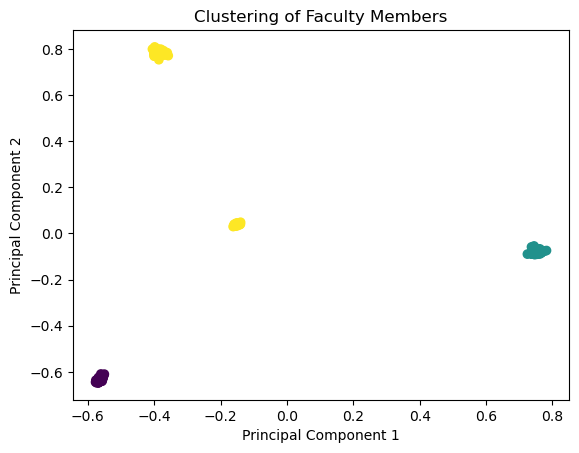

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Example: Combine features into a DataFrame 'features_df'
# (You would replace this with your actual feature extraction process)
features_df = df

# Feature extraction and transformation
tfidf_vectorizer = TfidfVectorizer()
onehot_encoder = OneHotEncoder()
pca = PCA(n_components=2)

# Combine text features
text_features = features_df['Bio']

# Transform text features to a dense matrix
text_features_matrix = tfidf_vectorizer.fit_transform(text_features).toarray()

# Combine all features into a single feature matrix
features_matrix = pd.concat([
    pd.DataFrame(text_features_matrix, columns=[f'TFIDF_{i}' for i in range(text_features_matrix.shape[1])]),
    pd.DataFrame(onehot_encoder.fit_transform(features_df[['Division']]).toarray(), columns=onehot_encoder.get_feature_names_out(['Division']))
], axis=1)

# Apply dimensionality reduction
reduced_features = pca.fit_transform(features_matrix)

# Apply clustering (K-Means in this example)
kmeans = KMeans(n_clusters=3, n_init=10)  # Explicitly setting n_init
features_df['Cluster'] = kmeans.fit_predict(reduced_features)


# Visualize the clusters
import matplotlib.pyplot as plt

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=features_df['Cluster'], cmap='viridis')
plt.title('Clustering of Faculty Members')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [141]:
df.columns

Index(['Professor Name', 'Division', 'Bio', 'Research Area 1',
       'Research Area 2', 'Research Area 3', 'Research Area 4',
       'Research Area 5', 'Research Area 6', 'Research Area 7',
       'Research Area 8', 'Research Area 9', 'Research Area 10',
       'Research Area 11', 'Research Area 12', 'Research Area 13',
       'Research Area 14', 'Research Area 15', 'Research Area 16',
       'Research Area 17', 'Research Area 18', 'Research Area 19',
       'Research Area 20', 'Research Area 21', 'Research Website 1',
       'Research Website 2', 'Research Website 3', 'Research Website 4',
       'Research Website 5', 'Research Website 6', 'Cluster'],
      dtype='object')

TF-IDF Matrix Shape: (376, 9253)
One-Hot Encoded Matrix Shape: (376, 126)


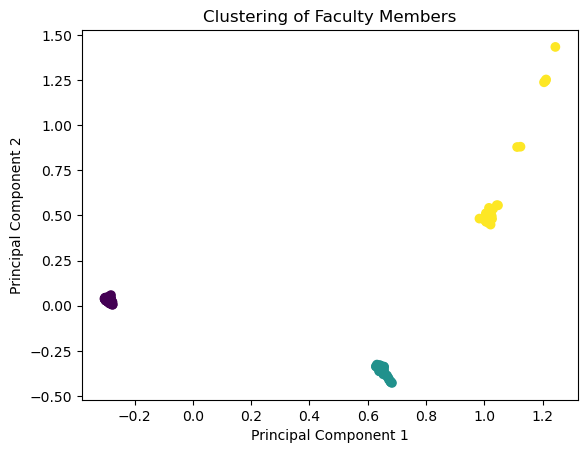

In [142]:
import numpy as np  # Import NumPy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Example: Combine features into a DataFrame 'features_df'
# (You would replace this with your actual feature extraction process)
features_df = df

# Handling NaN values in text features
text_features = features_df['Professor Name'].fillna('') + ' ' + features_df['Bio'].fillna('')
for i in range(1, sum(col.startswith('Research Area') for col in df.columns)+1):
    text_features += ' ' + features_df[f'Research Area {i}'].fillna('')

# Feature extraction and transformation
tfidf_vectorizer = TfidfVectorizer()
onehot_encoder = OneHotEncoder()
pca = PCA(n_components=2)

# Combine all features into a single feature matrix
text_features_matrix = tfidf_vectorizer.fit_transform(text_features).toarray()
research_websites_list = []
for i in range(1, sum(col.startswith('Research Website') for col in df.columns)+1):
    research_websites_list.append(f'Research Website {i}')
    
onehot_encoded_matrix = onehot_encoder.fit_transform(features_df[research_websites_list]).toarray()

# Check the shapes before concatenating
print("TF-IDF Matrix Shape:", text_features_matrix.shape)
print("One-Hot Encoded Matrix Shape:", onehot_encoded_matrix.shape)

# Concatenate the matrices
features_matrix = np.concatenate([text_features_matrix, onehot_encoded_matrix], axis=1)

# Apply dimensionality reduction
reduced_features = pca.fit_transform(features_matrix)

# Apply clustering (K-Means in this example)
kmeans = KMeans(n_clusters=3, n_init=10)
features_df['Cluster'] = kmeans.fit_predict(reduced_features)

# Visualize the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=features_df['Cluster'], cmap='viridis')
plt.title('Clustering of Faculty Members')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [143]:
features_df

,Professor Name,Division,Bio,Research Area 1,Research Area 2,Research Area 3,Research Area 4,Research Area 5,Research Area 6,Research Area 7,...,Research Area 19,Research Area 20,Research Area 21,Research Website 1,Research Website 2,Research Website 3,Research Website 4,Research Website 5,Research Website 6,Cluster
0,Robert Volcic,science,"Prior to joining NYU Abu Dhabi in 2015, he was...",Neuroscience,Cognitive Systems,0,0,0,0,0,...,0,0,0,Volcic Lab,0,0,0,0,0,1
1,Jon Sprouse,science,Jon Sprouse is an experimental syntactician. H...,Linguistics,Experimental Syntax,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Maya Kesrouany,arts-and-humanities,Maya Kesrouany is an Assistant Professor of Mo...,twentieth- and twenty-first century cultural p...,translation theory,aesthetics and politics,visual culture,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sabino Kornrich,social-science,Sabino Kornrich is a sociologist who studies i...,Family,Inequality,Gender,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Masha Kirasirova,arts-and-humanities,Masha Kirasirova is a historian of exchanges b...,Political and Cultural History of the Soviet U...,Colonialism/Anti-colonialism,Orientalism,Transnational History,Central Asia,the Modern Middle East,the Global Cold War,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,Jonathan Shannon,arts-and-humanities,Jonathan Shannon earned a BA in English Litera...,Arab world,Mediterranean,Music,Arts,Aesthetics,Migration,Food,...,0,0,0,0,0,0,0,0,0,0
372,Alicja Reuben,social-science,Alicja Reuben holds a BSFS from Georgetown Uni...,CSR,Gender,Valuation Techniques,SSC,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373,Andrew Wilson Tillotson,science,Andy's focus at NYU Abu Dhabi is teaching phys...,Physics Education Research,Instructional Strategies,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374,Qingtao Chen,science,"Qingtao Chen studies Mathematical Physics, a s...",Mathematical Physics,Quantum Topology and Global Differential Geom...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Assuming df is your DataFrame
bios = df['Bio'].dropna()

# Convert ENGLISH_STOP_WORDS to a list
stop_words_list = list(ENGLISH_STOP_WORDS)

# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words_list, max_features=50)  # Adjust max_features as needed

# Fit and transform the bios
tfidf_matrix = tfidf_vectorizer.fit_transform(bios)

# Get feature names (keywords) from the vectorizer
keywords = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame for the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=keywords)

# Calculate cosine similarity between faculty members based on TF-IDF scores
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create a DataFrame for the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=bios.index, columns=bios.index)

# Print the resulting DataFrames
print("TF-IDF Matrix:")
print(tfidf_df)
print("\nSimilarity Matrix:")
print(similarity_df)

TF-IDF Matrix:
          abu  american    arabic       art  assistant  associate     award  \
0    0.337492  0.000000  0.000000  0.000000   0.000000        0.0  0.000000   
1    0.182287  0.000000  0.000000  0.000000   0.227952        0.0  0.722859   
2    0.072894  0.000000  0.822231  0.000000   0.091155        0.0  0.000000   
3    0.000000  0.586121  0.000000  0.000000   0.000000        0.0  0.000000   
4    0.000000  0.000000  0.000000  0.000000   0.000000        0.0  0.000000   
..        ...       ...       ...       ...        ...        ...       ...   
371  0.000000  0.000000  0.000000  0.000000   0.000000        0.0  0.096864   
372  0.000000  0.000000  0.000000  0.000000   0.000000        0.0  0.000000   
373  0.375742  0.000000  0.000000  0.000000   0.234935        0.0  0.000000   
374  0.202122  0.270032  0.000000  0.000000   0.000000        0.0  0.267172   
375  0.149051  0.000000  0.000000  0.113733   0.093195        0.0  0.000000   

         book    center  college  ..

In [145]:
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,366,367,368,369,370,371,372,373,374,375
0,1.000000,0.391976,0.092677,0.000000,0.106880,0.357049,0.286338,0.000000,0.206735,0.357324,...,0.354145,0.138644,0.060951,0.074312,0.144555,0.019645,0.179601,0.452530,0.421241,0.170900
1,0.391976,1.000000,0.107355,0.061476,0.177159,0.523803,0.276956,0.000000,0.397352,0.542019,...,0.303646,0.149769,0.180247,0.143124,0.166071,0.132314,0.173512,0.418421,0.345615,0.207051
2,0.092677,0.107355,1.000000,0.077606,0.323349,0.080932,0.099888,0.206016,0.092972,0.111580,...,0.101611,0.029945,0.863474,0.187865,0.077663,0.255708,0.119583,0.244996,0.187920,0.204280
3,0.000000,0.061476,0.077606,1.000000,0.151019,0.116319,0.070212,0.252922,0.079323,0.217324,...,0.480475,0.269982,0.041071,0.195413,0.492124,0.195112,0.512133,0.063359,0.277955,0.238968
4,0.106880,0.177159,0.323349,0.151019,1.000000,0.176925,0.126375,0.193208,0.161424,0.099489,...,0.162449,0.073926,0.132524,0.492794,0.265347,0.384073,0.298321,0.183532,0.091504,0.282393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0.019645,0.132314,0.255708,0.195112,0.384073,0.147489,0.109813,0.304293,0.117166,0.143315,...,0.166015,0.078709,0.170901,0.145102,0.220627,1.000000,0.236779,0.105782,0.077247,0.263093
372,0.179601,0.173512,0.119583,0.512133,0.298321,0.217198,0.158151,0.181783,0.209158,0.230501,...,0.443300,0.251595,0.049836,0.163643,0.445788,0.236779,1.000000,0.102613,0.332555,0.239047
373,0.452530,0.418421,0.244996,0.063359,0.183532,0.343411,0.522527,0.000000,0.271751,0.370178,...,0.303799,0.077178,0.270908,0.147827,0.109817,0.105782,0.102613,1.000000,0.285127,0.195395
374,0.421241,0.345615,0.187920,0.277955,0.091504,0.263477,0.167948,0.127883,0.036545,0.300062,...,0.348890,0.211606,0.106206,0.135210,0.289522,0.077247,0.332555,0.285127,1.000000,0.255411


In [146]:
import pandas as pd
from bs4 import BeautifulSoup

# Read HTML file
with open("courses.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Initialize lists to store data
categories = []
codes = []
names = []
combined_info = []  # Store both description and previously taught together
appearances = []
current_professors = []

# Iterate over each course entry
for course in soup.find_all('li', class_='item open'):
    # Extract category and code
    category_code = course['data-peoplesoftid']
    category, code = category_code.split(" ", 1)

    # Extract name
    name = course.find('button').text.strip()

    # Extract combined info (description and previously taught)
    combined_text = ' '.join([p.text.strip() for p in course.find_all('p')])

    # Extract appearances
    appearances_list = [appearance.text.strip() for appearance in course.select('.appearances li')]

    # Extract current professors
    professors = [prof.text.strip() for prof in course.select('.meeting .professor')]

    # Append data to lists
    categories.append(category)
    codes.append(code)
    names.append(name)
    combined_info.append(combined_text)
    appearances.append(appearances_list)
    current_professors.append(professors)

# Create Pandas DataFrame
courses_df = pd.DataFrame({
    'Category': categories,
    'Code': codes,
    'Name': names,
    'Combined Info': combined_info,
    'Appearances': appearances,
    'Current Professors': current_professors
})

# Assuming you have already created the courses_df DataFrame

# Split the Combined Info column
split_info = courses_df['Combined Info'].str.split('Previously taught:', n=1, expand=True)

# Assign the split columns to the DataFrame
courses_df['Description'] = split_info[0].str.strip()
courses_df['Previously Taught'] = split_info[1].str.strip()
courses_df['Previously Taught'] = courses_df['Previously Taught'].str.replace('This course appears in...', '').str.strip()

# Drop the original Combined Info column
courses_df = courses_df.drop(columns=['Combined Info'])

# Display the DataFrame
courses_df

,Category,Code,Name,Appearances,Current Professors,Description,Previously Taught
0,ACS-UH,1010X,ACS-UH 1010X Anthropology and the Arab World,"[Core Curriculum > Islamic Studies, Majors > A...",[],"How have anthropologists encountered, written ...","Spring 2017, Fall 2017, Spring 2019, Spring 20..."
1,ACS-UH,1011X,ACS-UH 1011X Introduction to Modern Arabic Lit...,"[Core Curriculum > Islamic Studies, Majors > A...",[Maurice Pomerantz],This course provides an overview of Arabic lit...,"Fall 2016, Spring 2018, Fall 2018, Spring 2020..."
2,ACS-UH,1012X,ACS-UH 1012X Emergence of the Modern Middle East,"[Core Curriculum > Islamic Studies, Majors > A...",[Suphan Kirmizialtin],"At the crossroads between Asia, Africa and Eur...","Fall 2016, Fall 2017, Fall 2018, Fall 2019, Sp..."
3,ACS-UH,1213JX,ACS-UH 1213JX Arab Architecture in its Modern ...,"[Core Curriculum > Islamic Studies, Majors > A...",[],Architecture in the Arab World underwent profo...,January 2023
4,ACS-UH,1214X,ACS-UH 1214X Quran as Literature,"[Core Curriculum > Islamic Studies, Majors > A...",[],This class is an introduction to Quran as lite...,Fall 2023
...,...,...,...,...,...,...,...
1675,WRIT-UH,1139,WRIT-UH 1139 FYWS: Exploring Our Linguistic Id...,[Core Curriculum > First Year Writing Seminars],[],In this global era where one's ethnic backgrou...,"Spring 2023, Fall 2023"
1676,WRIT-UH,1140,WRIT-UH 1140 FYWS: Racisms and Race,[Core Curriculum > First Year Writing Seminars],"[Venkatesan (Ram) Natarajan, Venkatesan (Ram) ...",How does the false idea that some races are be...,"Spring 2023, Fall 2023"
1677,WRIT-UH,1141,WRIT-UH 1141 FYWS: Understanding Photography,[Core Curriculum > First Year Writing Seminars],[],What exactly is a photograph? The photographic...,Spring 2023
1678,WRIT-UH,1142,WRIT-UH 1142 FYWS: Genders and Falconry,[Core Curriculum > First Year Writing Seminars],[],This FYWS explores how women contributed to th...,"Spring 2023, Fall 2023"


In [147]:
# Assuming you have already created the courses_df DataFrame

# Count the number of classes with empty Current Professors
empty_professors_count = courses_df['Current Professors'].apply(lambda x: len(x) != 0).sum()

# Display the count
print("Number of classes with empty Current Professors:", empty_professors_count)


Number of classes with empty Current Professors: 572


In [148]:
df.columns

Index(['Professor Name', 'Division', 'Bio', 'Research Area 1',
       'Research Area 2', 'Research Area 3', 'Research Area 4',
       'Research Area 5', 'Research Area 6', 'Research Area 7',
       'Research Area 8', 'Research Area 9', 'Research Area 10',
       'Research Area 11', 'Research Area 12', 'Research Area 13',
       'Research Area 14', 'Research Area 15', 'Research Area 16',
       'Research Area 17', 'Research Area 18', 'Research Area 19',
       'Research Area 20', 'Research Area 21', 'Research Website 1',
       'Research Website 2', 'Research Website 3', 'Research Website 4',
       'Research Website 5', 'Research Website 6', 'Cluster'],
      dtype='object')

In [149]:
courses_df.columns

Index(['Category', 'Code', 'Name', 'Appearances', 'Current Professors',
       'Description', 'Previously Taught'],
      dtype='object')

In [150]:
import pandas as pd
from collections import defaultdict

# Convert list-like string to list
courses_df['Current Professors'] = courses_df['Current Professors'].apply(lambda x: x.strip("[]").replace("'", "").split(", ") if isinstance(x, str) else [])

# Create a copy of df to start with
result_df = df.copy()

# Create dictionary to hold course information for each professor
professor_courses = defaultdict(lambda: {'Category': [], 'Code': [], 'Name': [], 'Appearances': [], 'Description': [], 'Previously Taught': []})

# Iterate through each row in courses_df
for _, row in courses_df.iterrows():
    professors = row['Current Professors']
    for professor in professors:
        professor_courses[professor]['Category'].append(row['Category'])
        professor_courses[professor]['Code'].append(row['Code'])
        professor_courses[professor]['Name'].append(row['Name'])
        professor_courses[professor]['Appearances'].append(row['Appearances'])
        professor_courses[professor]['Description'].append(row['Description'])
        professor_courses[professor]['Previously Taught'].append(row['Previously Taught'])

# Add new columns for each course category
for professor, courses in professor_courses.items():
    for key in courses.keys():
        col_name = f"{professor}_{key}"
        result_df.loc[:, col_name] = ""

# Fill the new columns with course information
for index, row in result_df.iterrows():
    professors = row['Professor Name'].split(", ")  # Split professor names
    for professor in professors:
        if professor in professor_courses:
            courses = professor_courses[professor]
            for key, value in courses.items():
                col_name = f"{professor}_{key}"
                result_df.at[index, col_name] = value

result_df

,Professor Name,Division,Bio,Research Area 1,Research Area 2,Research Area 3,Research Area 4,Research Area 5,Research Area 6,Research Area 7,...,Research Area 19,Research Area 20,Research Area 21,Research Website 1,Research Website 2,Research Website 3,Research Website 4,Research Website 5,Research Website 6,Cluster
0,Robert Volcic,science,"Prior to joining NYU Abu Dhabi in 2015, he was...",Neuroscience,Cognitive Systems,0,0,0,0,0,...,0,0,0,Volcic Lab,0,0,0,0,0,1
1,Jon Sprouse,science,Jon Sprouse is an experimental syntactician. H...,Linguistics,Experimental Syntax,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Maya Kesrouany,arts-and-humanities,Maya Kesrouany is an Assistant Professor of Mo...,twentieth- and twenty-first century cultural p...,translation theory,aesthetics and politics,visual culture,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sabino Kornrich,social-science,Sabino Kornrich is a sociologist who studies i...,Family,Inequality,Gender,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Masha Kirasirova,arts-and-humanities,Masha Kirasirova is a historian of exchanges b...,Political and Cultural History of the Soviet U...,Colonialism/Anti-colonialism,Orientalism,Transnational History,Central Asia,the Modern Middle East,the Global Cold War,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,Jonathan Shannon,arts-and-humanities,Jonathan Shannon earned a BA in English Litera...,Arab world,Mediterranean,Music,Arts,Aesthetics,Migration,Food,...,0,0,0,0,0,0,0,0,0,0
372,Alicja Reuben,social-science,Alicja Reuben holds a BSFS from Georgetown Uni...,CSR,Gender,Valuation Techniques,SSC,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373,Andrew Wilson Tillotson,science,Andy's focus at NYU Abu Dhabi is teaching phys...,Physics Education Research,Instructional Strategies,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374,Qingtao Chen,science,"Qingtao Chen studies Mathematical Physics, a s...",Mathematical Physics,Quantum Topology and Global Differential Geom...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
courses_df

,Category,Code,Name,Appearances,Current Professors,Description,Previously Taught
0,ACS-UH,1010X,ACS-UH 1010X Anthropology and the Arab World,"[Core Curriculum > Islamic Studies, Majors > A...",[],"How have anthropologists encountered, written ...","Spring 2017, Fall 2017, Spring 2019, Spring 20..."
1,ACS-UH,1011X,ACS-UH 1011X Introduction to Modern Arabic Lit...,"[Core Curriculum > Islamic Studies, Majors > A...",[],This course provides an overview of Arabic lit...,"Fall 2016, Spring 2018, Fall 2018, Spring 2020..."
2,ACS-UH,1012X,ACS-UH 1012X Emergence of the Modern Middle East,"[Core Curriculum > Islamic Studies, Majors > A...",[],"At the crossroads between Asia, Africa and Eur...","Fall 2016, Fall 2017, Fall 2018, Fall 2019, Sp..."
3,ACS-UH,1213JX,ACS-UH 1213JX Arab Architecture in its Modern ...,"[Core Curriculum > Islamic Studies, Majors > A...",[],Architecture in the Arab World underwent profo...,January 2023
4,ACS-UH,1214X,ACS-UH 1214X Quran as Literature,"[Core Curriculum > Islamic Studies, Majors > A...",[],This class is an introduction to Quran as lite...,Fall 2023
...,...,...,...,...,...,...,...
1675,WRIT-UH,1139,WRIT-UH 1139 FYWS: Exploring Our Linguistic Id...,[Core Curriculum > First Year Writing Seminars],[],In this global era where one's ethnic backgrou...,"Spring 2023, Fall 2023"
1676,WRIT-UH,1140,WRIT-UH 1140 FYWS: Racisms and Race,[Core Curriculum > First Year Writing Seminars],[],How does the false idea that some races are be...,"Spring 2023, Fall 2023"
1677,WRIT-UH,1141,WRIT-UH 1141 FYWS: Understanding Photography,[Core Curriculum > First Year Writing Seminars],[],What exactly is a photograph? The photographic...,Spring 2023
1678,WRIT-UH,1142,WRIT-UH 1142 FYWS: Genders and Falconry,[Core Curriculum > First Year Writing Seminars],[],This FYWS explores how women contributed to th...,"Spring 2023, Fall 2023"
